# Plant Growth Data Classification
image.png

### Problem Statement  

Agricultural productivity depends significantly on understanding and managing soil conditions to meet the specific nutrient requirements of various crops. Each crop has unique needs for nitrogen (N), phosphorus (P), potassium (K), and specific sensitivities to soil temperature and pH levels. Consequently, it is vital for farmers to identify the most suitable crops for their soil conditions to maximize yields and ensure sustainable farming practices.  

This dataset encompasses critical soil properties, including nutrient levels (N, P, K), average soil temperature (in °F), and pH (acidity or basicity), mapped to specific crop types such as rice, maize, legumes, fruits, and cash crops like cotton and coffee. Using this data, the goal is to develop a predictive model to recommend the most suitable crops based on given soil characteristics.  

---

### Objective  

The objective is to build a machine learning model that predicts and recommends the best crop(s) based on soil nutrient levels (N, P, K), temperature, and pH. This model aims to empower farmers with informed decision-making tools to improve agricultural efficiency and productivity.  

---

### Goals  

1. **Analyze Soil Conditions for Different Crops:**  
   Explore the ideal soil nutrient composition, temperature ranges, and pH levels required for each crop in the dataset.  

2. **Develop a Predictive Model:**  
   Train a classification model capable of suggesting optimal crop choices based on input soil conditions, including N, P, K levels, temperature, and pH.  

3. **Evaluate Model Accuracy:**  
   Assess the model's performance by validating its recommendations against test data.  

4. **Provide Insights for Soil and Crop Management:**  
   Utilize the model's predictions to propose strategies for soil amendments or crop rotation to enhance soil suitability for desired crops.  

By achieving these goals, the solution will contribute to better resource utilization, sustainable farming practices, and improved agricultural outcomes.  

## importing libraries and loading datset

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
!pip install scikit-learn


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 124561 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.3_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.3) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1.3) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.0 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31631 sha256=7203aa6d0c44f3e611540867ff511df9c2bae1df12f780a1b3fab0e079e46c87
  Stored in directory: /root/.cache/pip/wheels/32/98/bd/4893d6923dd027f455b250367d402bfd69a6f4416581df46db
Successfully built libarchive


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn import model_selection
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('/content/Crop_recommendation.csv')

In [ ]:
df

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [ ]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [ ]:
print("Shape Of the dataframe" , df.shape)
df.isna().sum()

Shape Of the dataframe (2200, 8)


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [ ]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [ ]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

## EDA Exploratory Data Analysis

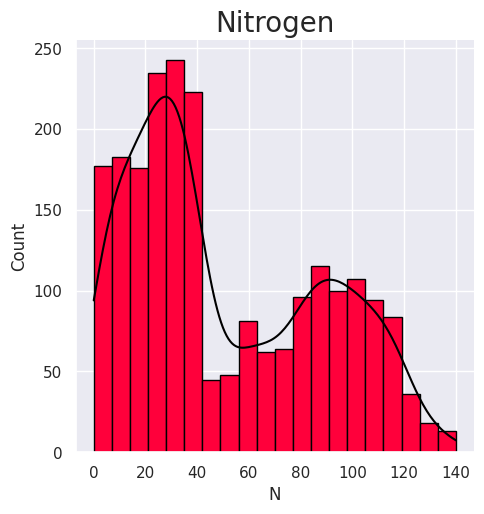

In [ ]:
sns.displot(x=df['N'] , data = df , bins =20 , kde = True ,edgecolor = 'black' ,color = 'black' , facecolor = '#ff003b')
plt.title('Nitrogen',size=20)
plt.show()

In [ ]:
sns.displot(x=df['N'], data=df, bins=20, kde=True, edgecolor='black', color='#ff003b', height=6, aspect=1)
plt.title('Nitrogen', size=20)
plt.xlabel('Nitrogen Levels', size=14)
plt.ylabel('Density', size=14)
plt.show()


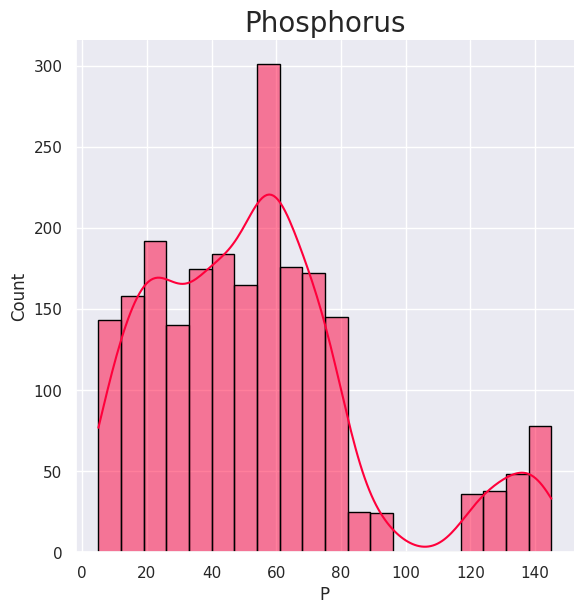

In [ ]:
sns.displot(x=df['P'], data=df, bins=20, kde=True, edgecolor='black', color='#ff003b', height=6, aspect=1)
plt.title('Phosphorus', size=20)
plt.xticks(range(0,150,20))
plt.show()

In [ ]:
sns.displot(x=df['K'], data=df, bins=20, kde=True, edgecolor='black', color='#ff003b', height=6, aspect=1)
plt.title('Potassium', size=20)

plt.show()

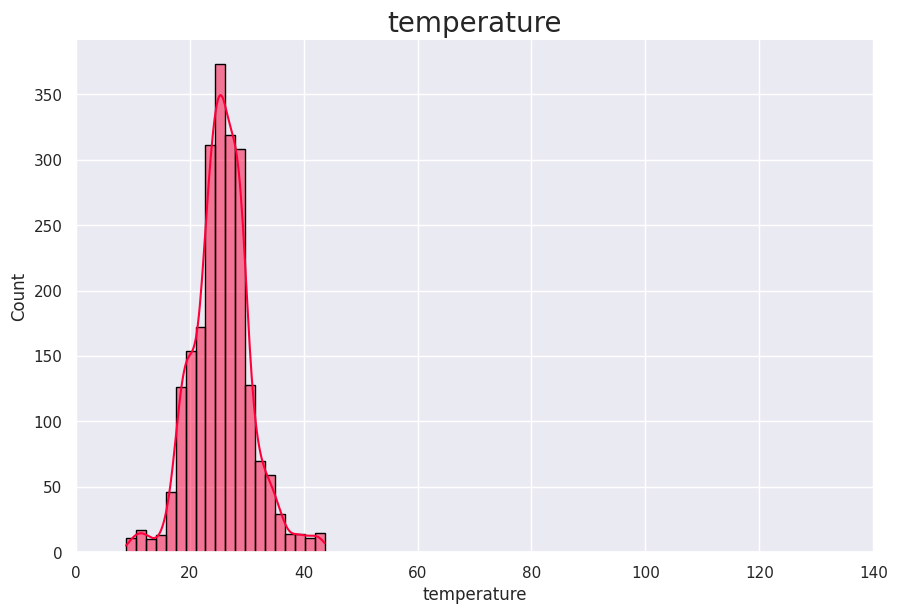

In [ ]:
sns.displot(x=df['temperature'], data=df, bins=20, kde=True, edgecolor='black', color='#ff003b', height=6, aspect=1.5)
plt.title('temperature', size=20)
plt.xticks(range(0,150,20))
plt.show()

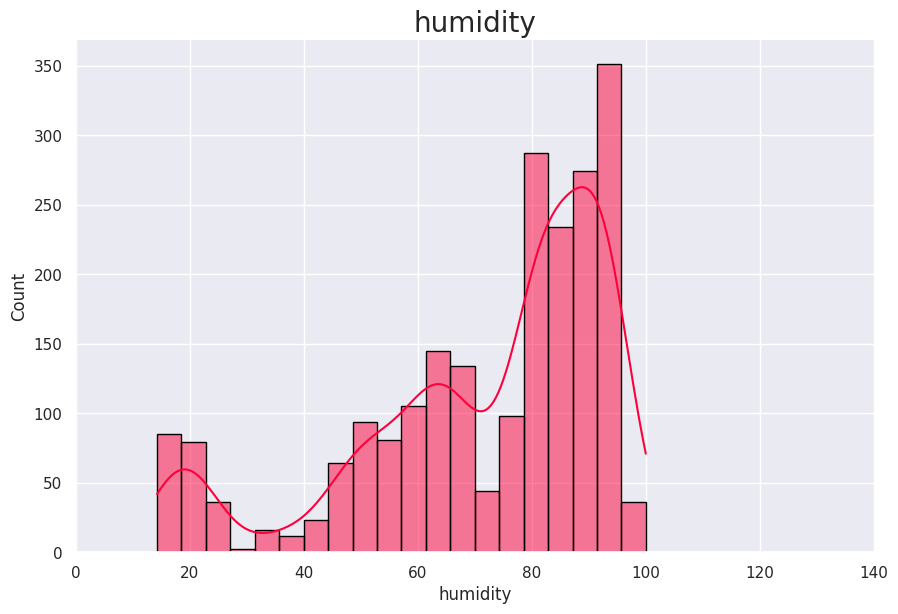

In [ ]:
sns.displot(x=df['humidity'], data=df, bins=20, kde=True, edgecolor='black', color='#ff003b', height=6, aspect=1.5)
plt.title('humidity', size=20)
plt.xticks(range(0,150,20))
plt.show()

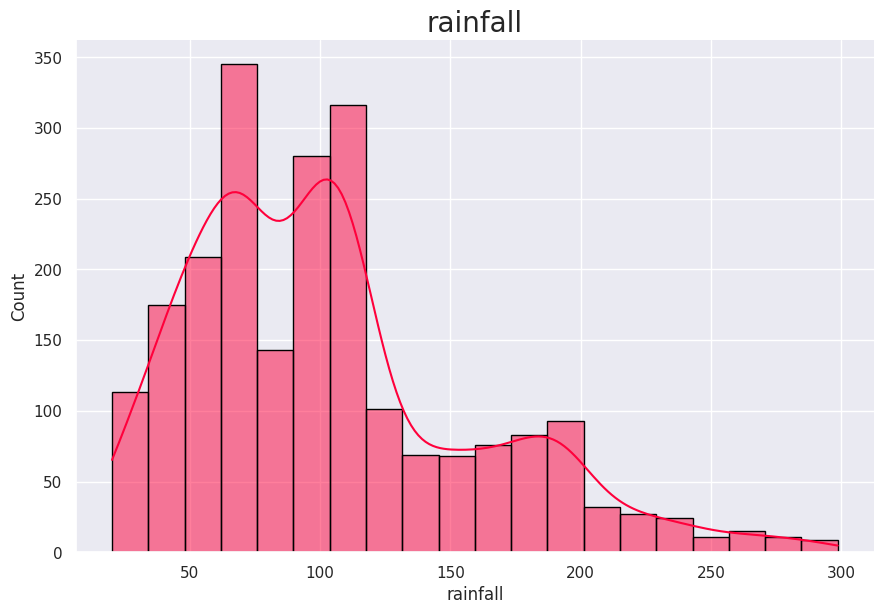

In [ ]:
sns.displot(x=df['rainfall'], data=df, bins=20, kde=True, edgecolor='black', color='#ff003b', height=6, aspect=1.5)
plt.title('rainfall', size=20)
#plt.xticks(range(0,150,20))
plt.show()

In [ ]:
df['rainfall'].value_counts()

rainfall
202.935536    1
26.036577     1
20.390205     1
21.179248     1
21.000099     1
             ..
65.816559     1
63.497263     1
65.628595     1
61.192509     1
140.937041    1
Name: count, Length: 2200, dtype: int64

In [ ]:
df['label'].value_counts()  # multi class classification

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

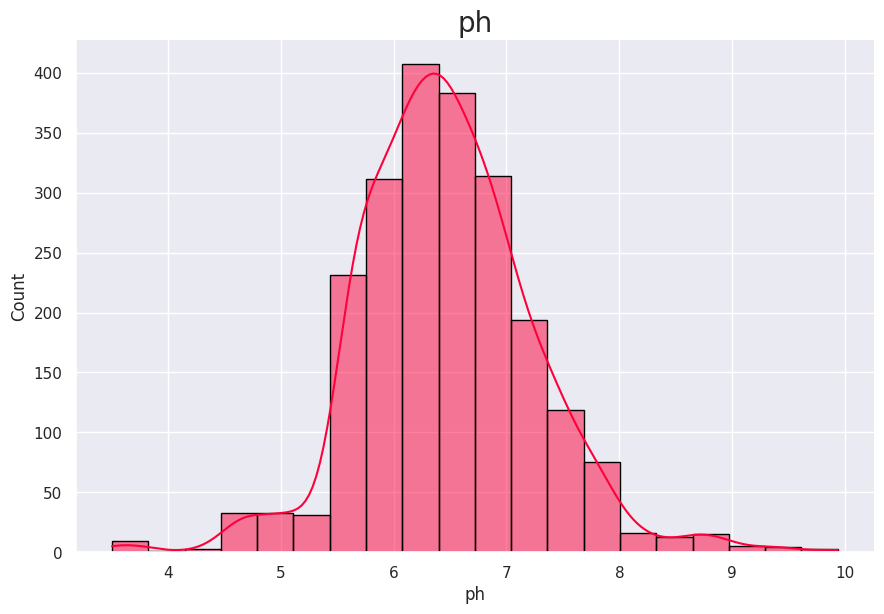

In [ ]:
sns.displot(x=df['ph'], data=df, bins=20, kde=True, edgecolor='black', color='#ff003b', height=6, aspect=1.5)
plt.title('ph', size=20)
#plt.xticks(range(0,150,20))
plt.show()

In [ ]:
# categorical plot
sns.relplot(x='rainfall', y='temperature',data=df,hue = 'label',kind='scatter',height= 5)
plt.show()

In [ ]:
sns.pairplot(data=df, hue='label')
plt.show()

In [ ]:
df['label'].nunique()

22

In [ ]:
crops =df['label'].unique()
print(len(crops))
print(crops)
print(pd.value_counts(df['label']))

22
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [ ]:
#filtering each unique label and strore it in a list df2 for further plot

df2=[]
for i in crops:
  df2.append(df[df['label']==i])
df2[1].head()

N   P   K  temperature   humidity        ph    rainfall  label
100  71  54  16    22.613600  63.690706  5.749914   87.759539  maize
101  61  44  17    26.100184  71.574769  6.931757  102.266244  maize
102  80  43  16    23.558821  71.593514  6.657965   66.719955  maize
103  73  58  21    19.972160  57.682729  6.596061   60.651715  maize
104  61  38  20    18.478913  62.695039  5.970458   65.438354  maize

In [ ]:
df2[1].head(10)

N   P   K  temperature   humidity        ph    rainfall  label
100  71  54  16    22.613600  63.690706  5.749914   87.759539  maize
101  61  44  17    26.100184  71.574769  6.931757  102.266244  maize
102  80  43  16    23.558821  71.593514  6.657965   66.719955  maize
103  73  58  21    19.972160  57.682729  6.596061   60.651715  maize
104  61  38  20    18.478913  62.695039  5.970458   65.438354  maize
105  68  41  16    21.776893  57.808406  6.158831  102.086169  maize
106  93  41  17    25.621717  66.504155  6.047907  105.465470  maize
107  89  60  19    25.191924  66.690290  5.913665   78.066396  maize
108  76  44  17    20.416831  62.554248  5.855442   65.277985  maize
109  67  60  25    24.921622  66.786274  5.750255  109.216228  maize

## EDA- Exploratory data analysis

In [ ]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 86.0 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:

from google.colab import files

# Download the Sweetviz report to your local machine
files.download('sweet_report.html')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Sample a subset of the dataset
small_df = df.sample(n=1000, random_state=42)  # Adjust 'n' as needed
report = sv.analyze(small_df)
report.show_html('sweet_report_small.html')


                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report_small.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
from google.colab import files

# Download the Sweetviz report to your local machine
files.download('sweet_report.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install autoviz==0.0.6

  Using cached autoviz-0.0.6-py3-none-any.whl.metadata (7.6 kB)
Using cached autoviz-0.0.6-py3-none-any.whl (31 kB)
  Attempting uninstall: autoviz
    Found existing installation: autoviz 0.1.905
    Uninstalling autoviz-0.1.905:
      Successfully uninstalled autoviz-0.1.905


In [ ]:
!pip install --upgrade autoviz

  Using cached autoviz-0.1.905-py3-none-any.whl.metadata (14 kB)
Using cached autoviz-0.1.905-py3-none-any.whl (67 kB)
  Attempting uninstall: autoviz
    Found existing installation: autoviz 0.0.6
    Uninstalling autoviz-0.0.6:
      Successfully uninstalled autoviz-0.0.6


In [ ]:
import autoviz
print(autoviz.__version__)

0.0.1


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
autoviz = AutoViz_Class()
autoviz.AutoViz(filename = "", dfte=df)

Shape of your Data Set loaded: (2200, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
To fix these data quality issues in the dataset, import FixDQ from autoviz...
    All variables

Number of All Scatter Plots = 10
All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


N    P   K  temperature  humidity      ph      rainfall   label 
0      90  42  43   20.879744   82.002744  6.502985  202.935536    rice
1      85  58  41   21.770462   80.319644  7.038096  226.655537    rice
2      60  55  44   23.004459   82.320763  7.840207  263.964248    rice
3      74  35  40   26.491096   80.158363  6.980401  242.864034    rice
4      78  42  42   20.130175   81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32   26.774637   66.413269  6.780064  177.774507  coffee
2196   99  15  27   27.417112   56.636362  6.086922  127.924610  coffee
2197  118  33  30   24.131797   67.225123  6.362608  173.322839  coffee
2198  117  32  34   26.272418   52.127394  6.758793  127.175293  coffee
2199  104  18  30   23.603016   60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['N'].plot(kind='hist', bins=20, title='N')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['P'].plot(kind='hist', bins=20, title='P')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['K'].plot(kind='hist', bins=20, title='K')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='N', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='N', y='P', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='P', y='K', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='K', y='temperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['N']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('N')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['P']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('P')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['K']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('K')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['temperature']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('temperature')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['N'].plot(kind='line', figsize=(8, 4), title='N')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['P'].plot(kind='line', figsize=(8, 4), title='P')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['K'].plot(kind='line', figsize=(8, 4), title='K')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_1['N'].plot(kind='hist', bins=20, title='N')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 90.9 MB/s eta 0:00:00
   ━━━━

In [ ]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [5]:
data = df.sample(frac=0.8, random_state=42).reset_index(drop = True)
data_unseen = df.drop(data.index).reset_index(drop = True)

In [6]:
print(data.shape , data_unseen.shape)

(1760, 8) (440, 8)


In [7]:
from pycaret.classification import *


In [8]:
classification_model = setup(data = data, target = 'label', session_id=42)

In [9]:
compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [12]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
# hyperParameters tuning
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


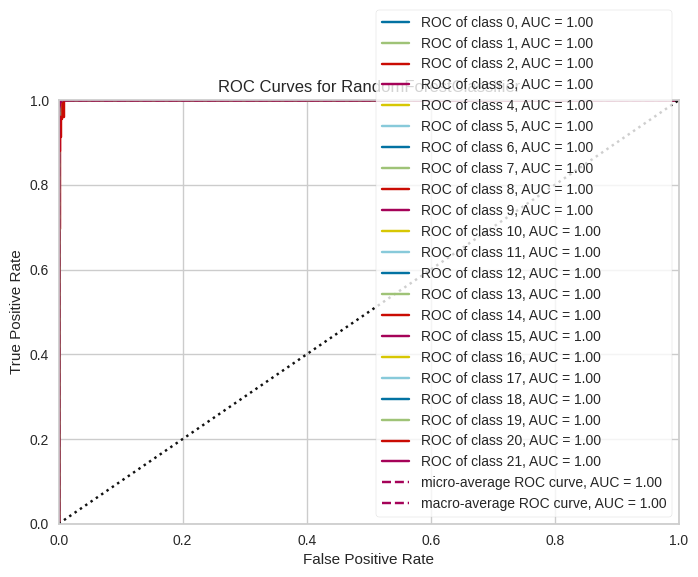

In [16]:
plot_model(tuned_rf ,plot='auc')

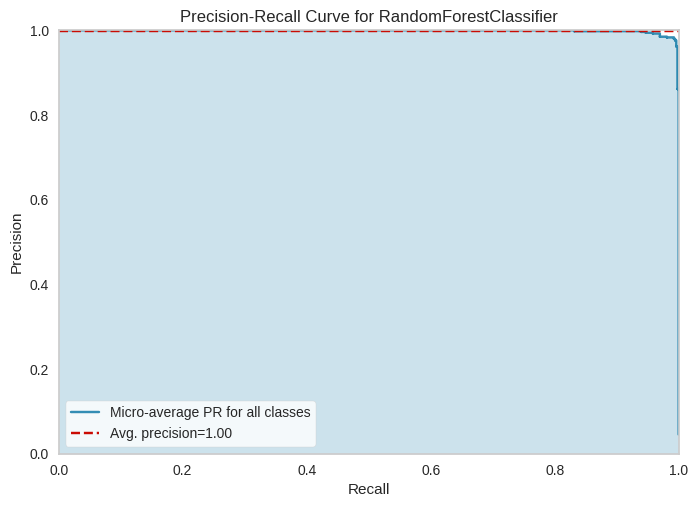

In [17]:
plot_model(tuned_rf ,plot='pr')

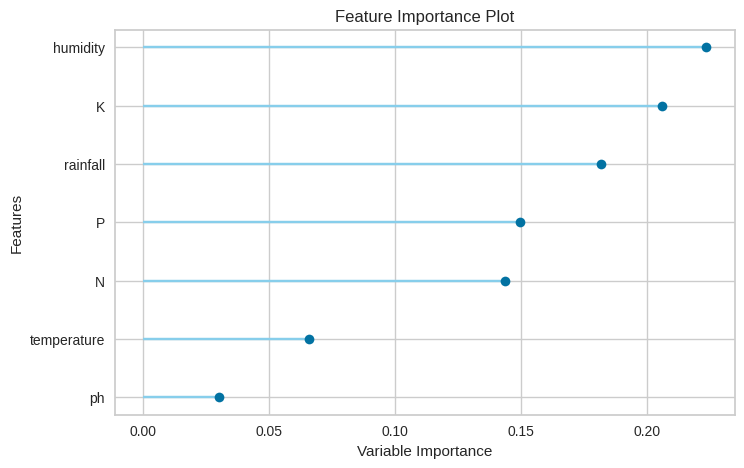

In [18]:
plot_model(tuned_rf ,plot='feature')

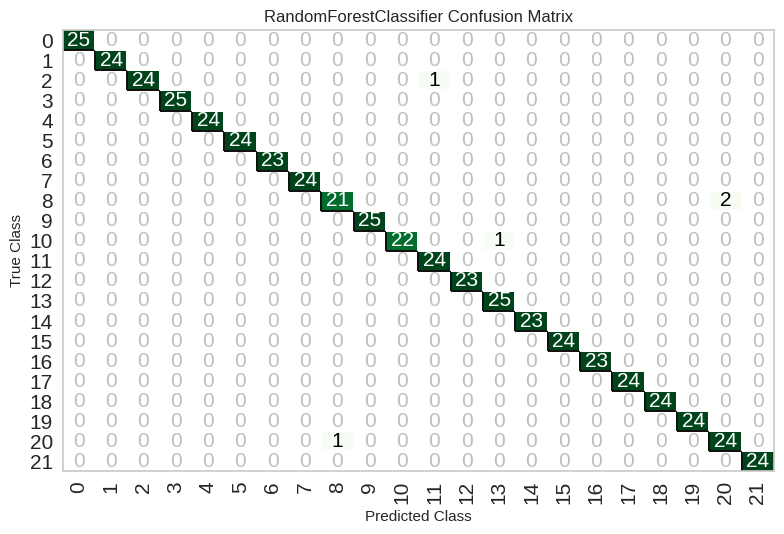

In [19]:
plot_model(tuned_rf,plot='confusion_matrix')

In [22]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [21]:
predict_model(tuned_rf)

N    P    K  temperature   humidity        ph    rainfall  \
915    24   38   22    24.478764  58.516640  8.202706   34.969334   
1266   97   50   41    24.529226  80.544983  7.070960  260.263397   
1729    9  122  201    29.587484  80.919342  5.570291   68.064171   
1260   37    6   13    26.030973  91.508194  7.511755  101.284775   
1081   20   27   41    20.513435  92.516762  5.700089  110.576401   
...   ...  ...  ...          ...        ...       ...         ...   
1437   83   11   53    29.540972  92.917786  6.163921   21.965307   
507    17   73   18    19.501122  34.510864  5.632353  197.375259   
629    14   19   14    17.684088  94.358154  6.699165  108.063820   
1173  104   25   55    29.811966  90.368813  6.123803   22.687666   
72     69   47   40    25.371227  76.240364  6.130136  183.827072   

            label prediction_label  prediction_score  
915     mothbeans        mothbeans            0.7812  
1266         rice             rice            0.8528  
1729       grapes           grapes            0.9790  
1260       orange           orange            0.9194  
1081  pomegranate      pomegranate            0.9516  
...           ...              ...               ...  
1437    muskmelon        muskmelon            0.9823  
507    pigeonpeas       pigeonpeas            0.8865  
629        orange           orange            0.9554  
1173    muskmelon        muskmelon            0.9850  
72           jute             jute            0.6813  

[528 rows x 10 columns]

from matplotlib import pyplot as plt
_df_0['N'].plot(kind='hist', bins=20, title='N')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['P'].plot(kind='hist', bins=20, title='P')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['K'].plot(kind='hist', bins=20, title='K')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['temperature'].plot(kind='hist', bins=20, title='temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='N', y='P', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='P', y='K', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='K', y='temperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='temperature', y='humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['N'].plot(kind='line', figsize=(8, 4), title='N')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['P'].plot(kind='line', figsize=(8, 4), title='P')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['K'].plot(kind='line', figsize=(8, 4), title='K')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['temperature'].plot(kind='line', figsize=(8, 4), title='temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

In [23]:
unseen_predict = predict_model(tuned_rf , data = data_unseen)
unseen_predict.head()

N   P   K  temperature   humidity        ph    rainfall   label  \
0  49  55  51    24.872120  93.905602  6.676579  135.169449  papaya   
1  59  62  49    43.360516  93.351913  6.941497  114.778069  papaya   
2  63  58  47    26.830540  90.753799  6.864144  144.665649  papaya   
3  70  65  52    30.420122  93.126595  6.583529   75.952950  papaya   
4  63  50  52    28.645555  93.226425  6.751748  115.816391  papaya   

  prediction_label  prediction_score  
0           papaya            0.8412  
1           papaya            0.9315  
2           papaya            0.6430  
3           papaya            0.8907  
4           papaya            0.8297

In [24]:
save_model(tuned_rf, 'tuned_rf_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['N', 'P', 'K', 'temperature',
                                              'humidity', 'ph', 'rainfall'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_fea...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight={}, criterion='entropy',
                                         max_depth=9, max

In [25]:
!pip install plotly


In [28]:

print(df.columns)


Index(['x', 'y', 'category'], dtype='object')


In [29]:
import plotly.express as px

# Plotly scatter plot for x vs y colored by category
fig = px.scatter(
    df,
    x='x',  # Temperature-like data
    y='y',  # Humidity-like data
    color='category',  # Crop type or category
    title="Scatter Plot: x vs y (Categorized by 'category')",
    labels={'x': 'X (Temperature-like)', 'y': 'Y (Humidity-like)', 'category': 'Category'},
    hover_data=['x', 'y', 'category']
)

# Show the plot
fig.show()
